<a href="https://colab.research.google.com/github/subbu27iitb/Deep-Learning/blob/main/TF%2BKerasII_Func_API_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. FUNCTIONAL API ILLUSTRATION using cifar10 dataset**
##**2. Confusion matrix on same illustration**
##**3. Accessing Model weights & weights' Distribution**
##**4. Save and load model**
##**5. GradientTape for differentiation**

Google -keras-Functional API and ctrl+F..toyResNet 

  https://keras.io/guides/functional_api/

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Dense 
from keras.layers import GlobalAveragePooling2D,add
from keras.models import Model, Sequential

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
input_shape=(32,32,3)

Model Definition

In [ ]:
inputs=keras.Input(shape=(input_shape))
x=Conv2D(32,3,activation='relu')(inputs)
x=Conv2D(64,3,activation='relu')(x)
block1_op=MaxPooling2D(3)(x)
#print(block1_op.shape)

x=Conv2D(64,3,activation='relu', padding='same')(block1_op)
x=Conv2D(64,3,activation='relu', padding='same')(x)
#print(x.shape)
block2_op=add([x,block1_op])#padding shd be 'same' to have same size of x and block1_op

x=Conv2D(64,3,activation='relu', padding='same')(block2_op)
x=Conv2D(64,3,activation='relu', padding='same')(x)
block3_op=add([x,block2_op])

x=Conv2D(64,3,activation='relu')(block3_op)
x=GlobalAveragePooling2D()(x)
x=Dense(256, activation='relu')(x)
x=Dropout(0.5)(x)
outputs=Dense(10)(x)

model_API= Model(inputs,outputs)
model_API.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                              

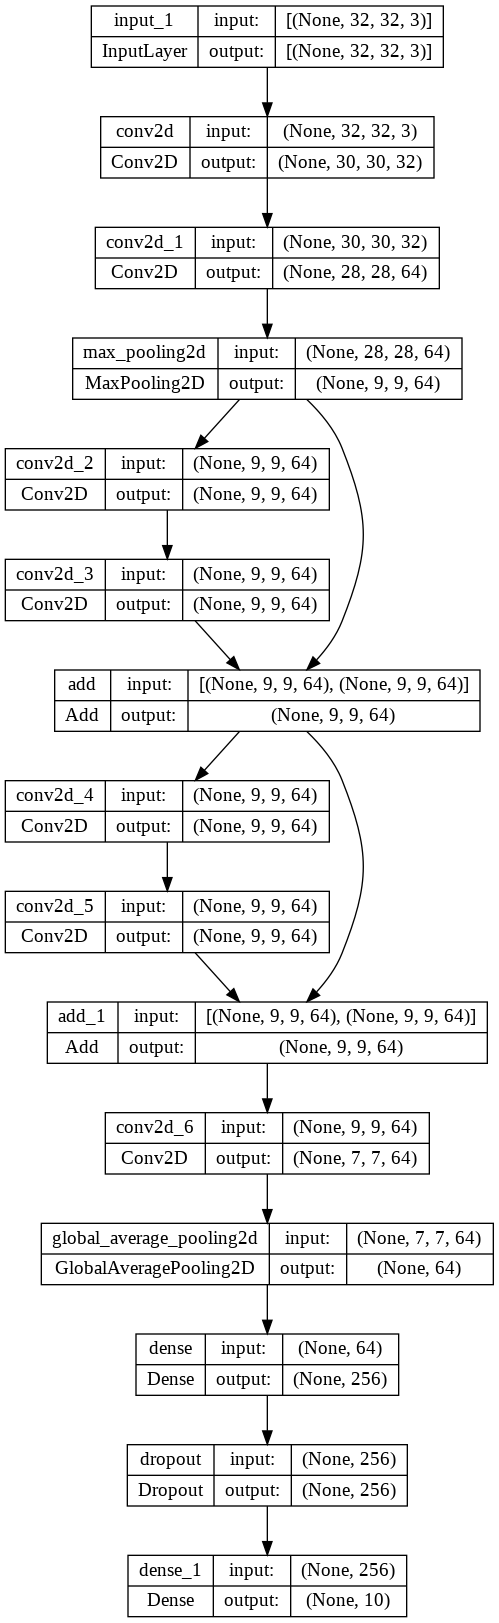

In [ ]:
keras.utils.plot_model(model_API,show_shapes=True)

1. Load cifar10 data
2. scale x_train & x_test; 
3. convert y_train & y_test to categorical if required.
4. Compile & Fit model

In [ ]:
(x_train,y_train),(x_test,y_test)= keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train=x_train.astype('float')/255.0
x_test=x_test.astype('float')/255.0

#y_train=keras.utils.to_categorical(y_train,10)
#y_test=keras.utils.to_categorical(y_test,10)
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(np.unique(y_train))
print(y_train[10])

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]
[4]


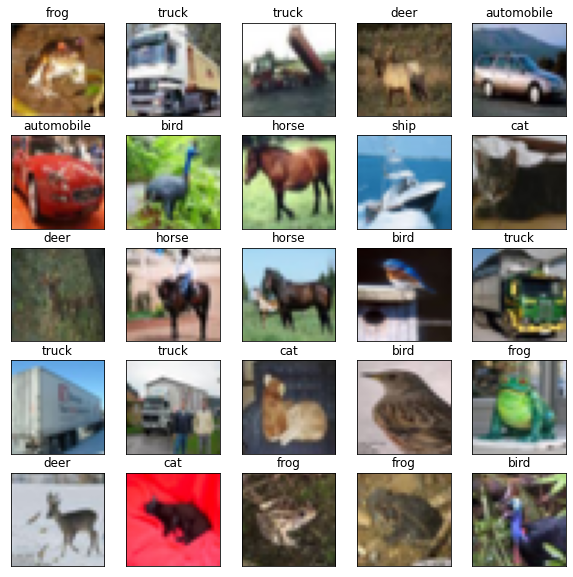

In [ ]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  name=class_names[int(y_train[i])]
  plt.title(name)


In [ ]:
#model_API.compile(optimizer='adam',
#                  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
#                  metrics=['accuracy'])
model_API.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

batch_size=128
epochs=15
model_API.fit(x_train,y_train,validation_split=0.35,batch_size=batch_size, epochs=epochs)

Epoch 1/15
254/254 [==============================] - 14s 20ms/step - loss: 1.9015 - accuracy: 0.2553 - val_loss: 1.7018 - val_accuracy: 0.3423
Epoch 2/15
254/254 [==============================] - 4s 17ms/step - loss: 1.5403 - accuracy: 0.4127 - val_loss: 1.3762 - val_accuracy: 0.4911
Epoch 3/15
254/254 [==============================] - 5s 19ms/step - loss: 1.3035 - accuracy: 0.5159 - val_loss: 1.1947 - val_accuracy: 0.5665
Epoch 4/15
254/254 [==============================] - 5s 19ms/step - loss: 1.1464 - accuracy: 0.5840 - val_loss: 1.0585 - val_accuracy: 0.6132
Epoch 5/15
254/254 [==============================] - 4s 17ms/step - loss: 1.0267 - accuracy: 0.6280 - val_loss: 0.9503 - val_accuracy: 0.6571
Epoch 6/15
254/254 [==============================] - 4s 17ms/step - loss: 0.9376 - accuracy: 0.6623 - val_loss: 0.8980 - val_accuracy: 0.6767
Epoch 7/15
254/254 [==============================] - 5s 19ms/step - loss: 0.8702 - accuracy: 0.6893 - val_loss: 0.8638 - val_accuracy: 0.695

In [ ]:
#result to match with the loss and accuracy of final epoch
score=model_API.evaluate(x_test,  y_test, verbose=2)
print("test_loss:", score[0])
print("test_accuracy:", score[1])

313/313 - 1s - loss: 0.7491 - accuracy: 0.7563 - 1s/epoch - 3ms/step
test_loss: 0.7491311430931091
test_accuracy: 0.7562999725341797


Evaluation

(32, 32, 3)
(32, 32)
(32, 32, 3)
[6]


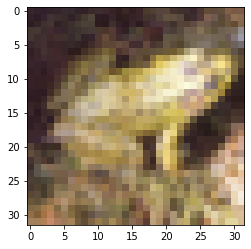

In [ ]:
print(x_test[19].shape)
test_img=x_test[19]
test_img_new=test_img[:,:,0]
print(test_img_new.shape)
plt.imshow(test_img, cmap='gray')
print(x_test[19].shape)
print(y_test[19])

In [ ]:
pred=np.argmax(model_API.predict(np.array([x_test[19]])))
#model_cnn.predict(np.array(x_test[999]))
pred_class=class_names[pred]
pred_class

1/1 [==============================] - 0s 212ms/step


'frog'

Confusion matrix

In [ ]:
y_pred= np.argmax(model_API.predict(x_test),-1)
#confusion matrix
con_mat = tf.math.confusion_matrix(y_test, y_pred).numpy()
print(con_mat)

313/313 [==============================] - 1s 3ms/step
[[826  15  51  16  13   1  11   7  24  36]
 [ 19 843   2   2   2   1  10   1   6 114]
 [ 53   3 647  67  72  57  79  10   3   9]
 [ 12   6  59 655  43 113  75  12   7  18]
 [ 17   1  49  81 753  11  65  21   1   1]
 [ 13   4  38 241  35 620  21  21   0   7]
 [  6   4  43  66  19  11 845   0   1   5]
 [ 17   3  40  67 101  61  12 678   0  21]
 [110  31  12  16   3   2   5   1 785  35]
 [ 23  32   4  11   4   0   4   3   8 911]]


In [ ]:
con_mat_df= pd.DataFrame(con_mat,
                         index=class_names,
                         columns=class_names
    )
print(con_mat_df)

            airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         826          15    51   16    13    1    11      7    24   
automobile        19         843     2    2     2    1    10      1     6   
bird              53           3   647   67    72   57    79     10     3   
cat               12           6    59  655    43  113    75     12     7   
deer              17           1    49   81   753   11    65     21     1   
dog               13           4    38  241    35  620    21     21     0   
frog               6           4    43   66    19   11   845      0     1   
horse             17           3    40   67   101   61    12    678     0   
ship             110          31    12   16     3    2     5      1   785   
truck             23          32     4   11     4    0     4      3     8   

            truck  
airplane       36  
automobile    114  
bird            9  
cat            18  
deer            1  
dog             7  
frog        

**Accessing Model Weights**

1. Print layers
2. Print #filters and weights in a specific layer
3. print shape of weight vectors
3. print distribution of weights in layers 

In [ ]:
print(model_API.layers)
print(model_API.layers[2])

[<keras.engine.input_layer.InputLayer object at 0x7f35654934f0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3565493490>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3565493e50>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3564bf0100>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3564bf0730>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3564b62e50>, <keras.layers.merging.add.Add object at 0x7f3565493d00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f35500b3b80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f35500b3550>, <keras.layers.merging.add.Add object at 0x7f35500b3b20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f35500b3070>, <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f35500ba520>, <keras.layers.core.dense.Dense object at 0x7f35500bab20>, <keras.layers.regularization.dropout.Dropout object at 0x7f35500c51c0>, <keras.layers.core.dense.Dense obje

In [ ]:
print(model_API.layers[2].filters) #no. of filters in a layer
print(model_API.layers[2].get_weights())

64
[array([[[[ 2.80821752e-02,  4.21248674e-02, -1.36398186e-04, ...,
           7.77441934e-02,  4.51895632e-02, -4.52693552e-02],
         [ 2.23470986e-01, -1.25332698e-01, -7.90288579e-03, ...,
          -1.45384565e-01, -4.22482193e-03, -1.86468139e-02],
         [ 1.61200464e-01, -2.86406707e-02,  2.37260237e-01, ...,
          -8.85877907e-02, -7.33576342e-02, -3.90363559e-02],
         ...,
         [ 2.16297549e-03, -1.66150779e-01,  5.32660037e-02, ...,
          -7.67724290e-02,  1.37521951e-02,  9.58513352e-04],
         [ 3.85000966e-02, -9.72974598e-02,  6.31621629e-02, ...,
          -5.05346805e-02,  9.93096009e-02, -2.63262074e-02],
         [ 1.10834271e-01, -1.32216990e-01, -7.49898935e-03, ...,
           5.79882152e-02,  1.42222270e-01, -6.11149333e-02]],

        [[-3.66490223e-02, -2.53082085e-02, -7.73665635e-03, ...,
           9.20593590e-02, -3.11121810e-02, -3.81305628e-02],
         [ 3.72585990e-02, -2.70832330e-01,  1.25131453e-04, ...,
          -9.77805

In [ ]:
print(len(model_API.layers[2].get_weights()))
print(model_API.layers[2].get_weights()[0].shape)#64 tensors. tensor dimensions-3x3x32. 32 is depth.
print(model_API.layers[2].get_weights()[1].shape)#64 no. of tensors i.e. kernels

2
(3, 3, 32, 64)
(64,)


(18432, 1)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


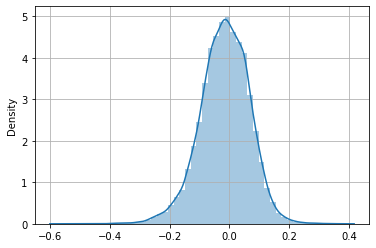

In [ ]:
w=model_API.layers[2].get_weights()[0].reshape(-1,1)
print(w.shape)
import seaborn as sns
sns.distplot(w,hist=True,kde=True)
plt.grid()

Check pointing saves only weights at the end of every epoch. It does not save the whole model along with its architecture.

#**Saving and Loading model**

##**Save Model**

In [ ]:
#mkdir: make a directory
!mkdir -p saved_model #folder by name "saved_model" is created
model_API.save('saved_model/model_API')# modelname.save(path_name)

In [ ]:
!ls saved_model/model_API #check what files are available in this path

assets	keras_metadata.pb  saved_model.pb  variables


##**Load model**

In [ ]:
#load the saved model
loaded_model= tf.keras.models.load_model('saved_model/model_API')
#check architecture
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                              

#**GradientTape**

 Refer: https://www.tensorflow.org/api_docs/python/tf/GradientTape

1. 1st order differenciation
2. 2nd order differenciation
3. Chain rule differentiation
4. Partial differentiation

In [26]:
#1st order differenciation
x= tf.Variable(3.0, trainable=True)
#x= tf.constant(3.0)
with tf.GradientTape() as t:
  #t.watch(x) #t.watch(x)#required if x=tf.constant(1.0)
  y=x**0.5
#print(t.gradient(y,x))
print(t.gradient(y,x).numpy())

0.28867513


In [17]:
#2nd order differenciation
x= tf.Variable(1.0, trainable=True)
#x= tf.constant(1.0)
with tf.GradientTape() as t:
  #t.watch(x)
  #y=x**4
  #dy_dx=t.gradient(y,x).numpy()
  with tf.GradientTape() as tt:
    #tt.watch(x)
    y=x**4
  dy_dx=tt.gradient(y,x)

d2y_dx2=t.gradient(dy_dx,x)
#print(t.gradient(y,x))
#print(t.gradient(y,x).numpy())
##d2y_dx2 #tensor flow object
d2y_dx2

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [25]:
#Chain rule differentiation
x=tf.Variable(1.0, trainable=True)
#x=tf.constant(1.0)
with tf.GradientTape(persistent=True) as t:
  #t.watch(x)#required if x=tf.constant(1.0)
  y=x*x
  z=y*y
dz_dx=t.gradient(z,x).numpy()
dy_dx=t.gradient(y,x).numpy()
print(dz_dx)
print(dy_dx)

4.0
2.0


In [54]:
#Partial differentiation
x=tf.Variable(2.0, trainable=True)
y=tf.Variable(3.0, trainable=True)
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  t.watch(y)
  z=2*(x**2)+3*(y**2)
print(t.gradient(z,[x,y]))
m= t.gradient(z,[x,y])
print("dz_dx:", m[0].numpy())
print("dz_dy:", m[1].numpy())

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>, <tf.Tensor: shape=(), dtype=float32, numpy=18.0>]
dz_dx: 8.0
dz_dy: 18.0
